In [1]:
%load_ext watermark
%watermark

Last updated: 2021-06-10T11:32:53.901239-05:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [46]:
vehiculos = pd.read_csv("data/vehiculos_procesado_con_grupos.csv").drop([
    "fabricante", "modelo", "transmision", "traccion","clase", "combustible", "consumo"],
axis=1)

In [47]:
vehiculos.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [48]:
datos_numericos = vehiculos.select_dtypes([int, float])
datos_categoricos = vehiculos.select_dtypes([object, "category"])

In [49]:
for col in datos_numericos.columns: 
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace= True)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizado = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizado = pd.DataFrame(datos_numericos_normalizado,
                                               columns=datos_numericos.columns)

In [51]:
datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True)

In [52]:
vehiculos_procesado = pd.concat([datos_numericos_normalizado, datos_categoricos_codificados], axis=1)

In [53]:
vehiculos_procesado.shape

(36791, 28)

In [14]:
vehiculosx = vehiculos_procesado.sample(2500)

In [15]:
vehiculosx.head()

,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,...,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
36740,0.294872,0.285714,0.454199,0.393464,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6876,0.717949,0.428571,0.432507,0.305011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26693,0.371795,0.285714,0.353657,0.281734,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
16783,0.602564,0.428571,0.488312,0.431373,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
29235,0.384615,0.285714,0.334805,0.260784,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [54]:
from sklearn.cluster import KMeans

In [55]:
estimador_kmedias = KMeans(n_clusters=8)

estimador_kmedias.fit(vehiculos_procesado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
clusters = estimador_kmedias.labels_
clusters

array([7, 1, 7, ..., 2, 2, 2])

In [57]:
estimador_kmedias.predict(vehiculos_procesado)

array([7, 1, 7, ..., 2, 2, 2])

In [58]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 3.31727075e-01,  2.57064614e-01,  3.54403459e-01,
         2.82268085e-01,  8.39644386e-02,  9.12084294e-02,
         1.34178466e-01,  1.85380310e-01,  1.71386236e-01,
         6.61837339e-02,  8.80803424e-02,  7.83174185e-01,
         2.51893316e-01,  9.45834705e-01,  5.41652947e-02,
         7.21644966e-15,  4.37932170e-01,  5.81165624e-02,
         4.87323016e-02,  2.18966085e-01,  1.16891669e-02,
         9.83042476e-01,  7.10542736e-15,  4.77444847e-03,
        -1.73749903e-14,  9.98518275e-01, -5.80091530e-15,
        -1.30451205e-15],
       [ 5.48443965e-01,  3.83840596e-01,  5.07835592e-01,
         4.53114356e-01,  1.97065908e-03,  1.62031968e-02,
         1.79548938e-02,  3.15305452e-02,  1.32253120e-01,
         2.33851544e-01,  1.42763302e-01,  5.63170571e-01,
         2.64944165e-01,  1.00000000e+00,  1.30451205e-15,
         6.93889390e-15,  7.94832494e-02,  6.49879571e-01,
         8.75848478e-04,  1.16049923e-02, -1.40165657e-14,
         1.55431223e-15,  1.00

In [59]:
centroides.shape

(8, 28)

In [60]:
estimador_kmedias.inertia_

64123.43380943371

In [61]:
print(KMeans.__doc__)

K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
        Method for initialization, defaults to 'k-means++':

        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.

        'random': choose k observations (rows) at random from data for
        the initial centroids.

        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.

    n_init : int, default=10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecut

In [62]:
from sklearn.metrics import euclidean_distances

In [63]:
distancias_centroides = euclidean_distances(centroides)
distancias_centroides

array([[0.        , 2.17713047, 2.24437548, 2.11792404, 1.45814103,
        2.30107654, 2.1906677 , 1.44427504],
       [2.17713047, 0.        , 2.47050668, 2.35012778, 2.54469506,
        1.37055599, 2.43922736, 1.55303152],
       [2.24437548, 2.47050668, 0.        , 2.07823837, 2.37007237,
        2.44820197, 2.25961644, 1.8443552 ],
       [2.11792404, 2.35012778, 2.07823837, 0.        , 2.09788246,
        2.19743579, 1.2300008 , 1.63646918],
       [1.45814103, 2.54469506, 2.37007237, 2.09788246, 0.        ,
        1.92131791, 2.39171946, 1.88361484],
       [2.30107654, 1.37055599, 2.44820197, 2.19743579, 1.92131791,
        0.        , 2.45824979, 1.73151534],
       [2.1906677 , 2.43922736, 2.25961644, 1.2300008 , 2.39171946,
        2.45824979, 0.        , 1.7970356 ],
       [1.44427504, 1.55303152, 1.8443552 , 1.63646918, 1.88361484,
        1.73151534, 1.7970356 , 0.        ]])

In [64]:
def resumen_cluster(cluster_id):
    cluster = vehiculos[clusters==cluster_id]
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [65]:
resumen_cluster(0)

{'clase_tipo': 'Coches pequeños',
 'traccion_tipo': 'dos',
 'transmision_tipo': 'Automatica',
 'combustible_tipo': 'Normal',
 'tamano_motor_tipo': 'mediano',
 'consumo_tipo': 'moderado',
 'co2_tipo': 'moderado',
 'year': 1997.8703094140883,
 'desplazamiento': 3.187409479920945,
 'cilindros': 5.599012345679013,
 'co2': 468.6549715548946,
 'consumo_litros_milla': 0.1994785092899809,
 'cluster_id': 0}

In [66]:
comparar_clusters(*np.unique(clusters))

cluster_id,0,1,2,3,4,5,6,7
clase_tipo,Coches pequeños,Camionetas,Coches pequeños,Coches pequeños,Coches pequeños,Coches pequeños,Coches pequeños,Camionetas
traccion_tipo,dos,dos,dos,dos,dos,dos,dos,dos
transmision_tipo,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica
combustible_tipo,Normal,Normal,Normal,Normal,Premium,Premium,Normal,Normal
tamano_motor_tipo,mediano,muy grande,muy pequeño,muy pequeño,mediano,muy grande,pequeño,grande
consumo_tipo,moderado,muy alto,muy bajo,bajo,moderado,muy alto,bajo,alto
co2_tipo,moderado,muy alto,muy bajo,bajo,moderado,muy alto,bajo,alto
year,1997.87,1994.64,2003.35,2003.43,2003.84,2004.24,1999.13,1999.3
desplazamiento,3.18741,4.87786,1.91619,2.66032,3.46386,5.47982,2.37846,3.87046
cilindros,5.59901,7.37377,4.03346,5.06678,6.28,8.66121,4.18068,6.19385


In [67]:
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [68]:
cluster_results = kmeans_cluster(vehiculos_procesado, 8)
cluster_summary = resumen_grafico_clustering(cluster_results)

In [69]:
cluster_summary

,cilindros,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,co2,co2_tipo_bajo,...,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,desplazamiento,tamano_motor_tipo_mediano,tamano_motor_tipo_muy grande,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,traccion_tipo_dos,transmision_tipo_Manual
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.250950,0.063983,0.031272,0.131919,0.700935,0.070093,0.000000,0.001438,0.320000,0.826743,...,0.000000,0.000000,0.036305,0.296273,0.428109,0.003954,0.204529,0.178289,0.731488,0.388569
1,0.299914,0.022787,0.037192,0.044788,0.039288,0.273704,0.102410,0.136721,0.404184,0.015977,...,0.021739,0.000000,0.027763,0.418923,0.275013,0.128601,0.008643,0.058146,0.548717,0.270822
2,0.145304,0.118054,0.017620,0.139469,0.630659,0.076850,0.001626,0.007726,0.241088,0.003253,...,0.000136,0.000000,0.998645,0.168754,0.026972,0.000000,0.754134,0.218352,0.910545,0.486988
3,0.299469,0.085441,0.086216,0.192824,0.559886,0.069695,0.000774,0.003614,0.354786,0.000000,...,0.993289,0.000000,0.000258,0.361516,0.388487,0.104543,0.051110,0.163655,0.675013,0.273619
4,0.383841,0.001971,0.016203,0.017955,0.031531,0.132253,0.233852,0.142763,0.507836,0.000000,...,0.000000,1.000000,0.000000,0.548444,0.079483,0.649880,0.000876,0.011605,0.563171,0.264944
5,0.256808,0.083016,0.090141,0.134051,0.185915,0.172162,0.066611,0.088650,0.354598,0.000000,...,0.989064,0.000000,0.001657,0.331003,0.440597,0.058492,0.049047,0.220381,0.781939,0.253190
6,0.177908,0.103715,0.049672,0.153785,0.354461,0.175243,0.010928,0.061395,0.304150,0.992450,...,0.000000,0.000000,0.013511,0.238317,0.156169,0.010133,0.314127,0.456785,0.798132,0.353070
7,0.475744,0.010291,0.083535,0.085351,0.313257,0.207930,0.084746,0.036622,0.483142,0.000000,...,0.054479,0.669794,0.000000,0.625621,0.042070,0.824153,0.000000,0.002421,0.634685,0.172821


In [70]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

In [71]:
matplotlib.rcParams['figure.figsize'] = [14, 14]

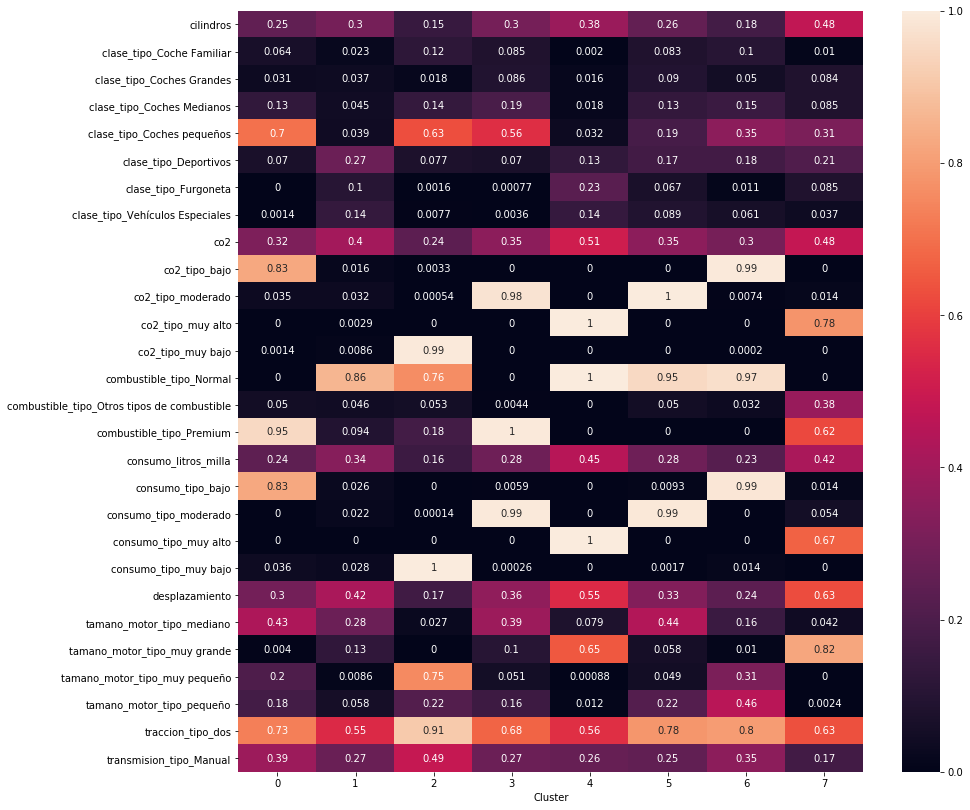

In [72]:
sns.heatmap(cluster_summary.transpose(), annot=True);

In [75]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clusters)

NameError: name 'X' is not defined